# **Importing required libraries**

---



In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import torch.utils.data as data
import numpy as np # to create numpy arrays (numerical operations and array handling)
import pandas as pd # to load the data and numbers into table called as 'data frames' (for data manipulation and analysis)
from sklearn.model_selection import train_test_split # to split the data unto training and test data
from sklearn.linear_model import LogisticRegression # import the logistic regression model
from sklearn.metrics import accuracy_score # to find accuracy of the model evaluation
import matplotlib.pyplot as plt # Matplotlib is for visualization
import seaborn as sns # Seaborn is for enhanced visualization

# **Loading Data Set**

---



In [ ]:
# Loading the dataset to a pandas Dataframe
health_data = pd.read_csv('/content/healthcare_dataset.csv')

# **Displaying and Interpreting Data**
---

* Using Pandas methods like head(), describe(), info() to explore the data.

In [ ]:
# Display of the first 5 rows
health_data.head()

,Name,Age,Gender,Blood Type,Medical Condition,Date of Admission,Doctor,Hospital,Insurance Provider,Billing Amount,Room Number,Admission Type,Discharge Date,Medication,Test Results
0,Tiffany Ramirez,81,Female,O-,Diabetes,2022-11-17,Patrick Parker,Wallace-Hamilton,Medicare,37490.983364,146,Elective,2022-12-01,Aspirin,Inconclusive
1,Ruben Burns,35,Male,O+,Asthma,2023-06-01,Diane Jackson,"Burke, Griffin and Cooper",UnitedHealthcare,47304.064845,404,Emergency,2023-06-15,Lipitor,Normal
2,Chad Byrd,61,Male,B-,Obesity,2019-01-09,Paul Baker,Walton LLC,Medicare,36874.896997,292,Emergency,2019-02-08,Lipitor,Normal
3,Antonio Frederick,49,Male,B-,Asthma,2020-05-02,Brian Chandler,Garcia Ltd,Medicare,23303.322092,480,Urgent,2020-05-03,Penicillin,Abnormal
4,Mrs. Brandy Flowers,51,Male,O-,Arthritis,2021-07-09,Dustin Griffin,"Jones, Brown and Murray",UnitedHealthcare,18086.344184,477,Urgent,2021-08-02,Paracetamol,Normal


In [ ]:
health_data.describe(include=object).T

,count,unique,top,freq
Name,10000,9378,Michael Johnson,7
Gender,10000,2,Female,5075
Blood Type,10000,8,AB-,1275
Medical Condition,10000,6,Asthma,1708
Date of Admission,10000,1815,2019-04-12,15
Doctor,10000,9416,Michael Johnson,7
Hospital,10000,8639,Smith PLC,19
Insurance Provider,10000,5,Cigna,2040
Admission Type,10000,3,Urgent,3391
Discharge Date,10000,1834,2021-11-28,14


In [ ]:
# Get some statistical defenitions for this data
health_data.describe().round(2)   # describe => statistical numbers of the data

,Age,Billing Amount,Room Number
count,10000.00,10000.00,10000.00
mean,51.45,25516.81,300.08
std,19.59,14067.29,115.81
min,18.00,1000.18,101.00
25%,35.00,13506.52,199.00
50%,52.00,25258.11,299.00
75%,68.00,37733.91,400.00
max,85.00,49995.90,500.00


* This dataset includes 10,000 observations or individuals.

* The average age is approximately 51.45 years, with a range from 18 to 85 years.


* The billing amount is ranging from $1000.1 to $49995.90.




In [ ]:
# Get basic information about the data frame
health_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Name                10000 non-null  object 
 1   Age                 10000 non-null  int64  
 2   Gender              10000 non-null  object 
 3   Blood Type          10000 non-null  object 
 4   Medical Condition   10000 non-null  object 
 5   Date of Admission   10000 non-null  object 
 6   Doctor              10000 non-null  object 
 7   Hospital            10000 non-null  object 
 8   Insurance Provider  10000 non-null  object 
 9   Billing Amount      10000 non-null  float64
 10  Room Number         10000 non-null  int64  
 11  Admission Type      10000 non-null  object 
 12  Discharge Date      10000 non-null  object 
 13  Medication          10000 non-null  object 
 14  Test Results        10000 non-null  object 
dtypes: float64(1), int64(2), object(12)
memory usage: 1.1+

* This dataset is composed by 10,000 rows and 15 columns of differents types (float, int and object: string)



---



In [ ]:
# Checking null values
pd.DataFrame(health_data.isnull().sum(), columns=["Null Values"]).rename_axis("Column Name")

,Null Values
Column Name,
Name,0
Age,0
Gender,0
Blood Type,0
Medical Condition,0
Date of Admission,0
Doctor,0
Hospital,0
Insurance Provider,0


* The data set doesn't contain any null value

In [ ]:
# number of rows and columns
health_data.shape

(10000, 15)

* (10000, 15) (R, C)

* 10000 refers to the number of rows or observations in the DataFrame.In this case, there are 10,000 individual entries.

* 15  refers to the number of columns or attributes in the DataFrame.In this DataFrame, there are 15 different attributes or features for each of the 10,000 entries.

In [ ]:
# Display the columns names
health_data.columns

Index(['Name', 'Age', 'Gender', 'Blood Type', 'Medical Condition',
       'Date of Admission', 'Doctor', 'Hospital', 'Insurance Provider',
       'Billing Amount', 'Room Number', 'Admission Type', 'Discharge Date',
       'Medication', 'Test Results'],
      dtype='object')

* health_data.columns is used to display the column names present in the dataset

In [ ]:
# The occurrences of the 'Age' column of the dataset
health_data['Age'].value_counts()

59    175
78    174
31    172
20    169
35    169
     ... 
34    125
47    125
85    123
22    123
45    120
Name: Age, Length: 68, dtype: int64

In [ ]:
# The occurrences of the 'Medical Condition' column of the dataset
health_data['Medical Condition'].value_counts()

Asthma          1708
Cancer          1703
Hypertension    1688
Arthritis       1650
Obesity         1628
Diabetes        1623
Name: Medical Condition, dtype: int64

In [ ]:
# The occurrences of the 'Medication' column of the dataset
health_data['Medication'].value_counts()

Penicillin     2079
Lipitor        2015
Ibuprofen      1976
Aspirin        1968
Paracetamol    1962
Name: Medication, dtype: int64

In [ ]:
# The occurrences of the 'Blood Type' column of the dataset
health_data['Blood Type'].value_counts()

AB-    1275
AB+    1258
B-     1252
O+     1248
O-     1244
B+     1244
A+     1241
A-     1238
Name: Blood Type, dtype: int64

In [ ]:
# The occurrences of the 'Gender' column of the dataset
health_data['Gender'].value_counts()

Female    5075
Male      4925
Name: Gender, dtype: int64

In [ ]:
# The occurrences of the 'Test Results' column of the dataset
health_data['Test Results'].value_counts()

Abnormal        3456
Inconclusive    3277
Normal          3267
Name: Test Results, dtype: int64

In [ ]:
# Group the data based on the 3 test results : nomal, abnormal and inconclusive
health_data.groupby('Test Results').mean(numeric_only=True)

,Age,Billing Amount,Room Number
Test Results,,,
Abnormal,51.372106,25537.998284,299.730613
Inconclusive,51.192554,25677.754136,298.794324
Normal,51.797368,25332.949312,301.745332


*  .mean(numeric_only=True): calculates the mean values for each numeric column within each group.
* mean is for numeric values, the non-numeric columns (Gender, Blood Type, Medical Condition, Date of Admission, Doctor ..) are excluded from these calculations.

# **Visualizing data using seaborn functions**

---



## Distribution of Age

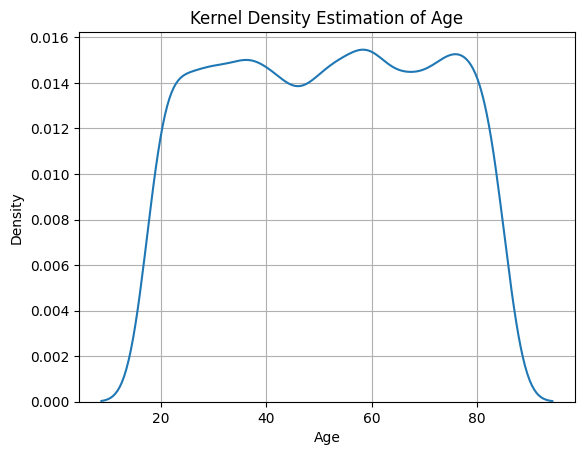

In [ ]:
# Distribution of Age
sns.kdeplot(health_data['Age'])
plt.title('Kernel Density Estimation of Age')
plt.grid()
plt.show()

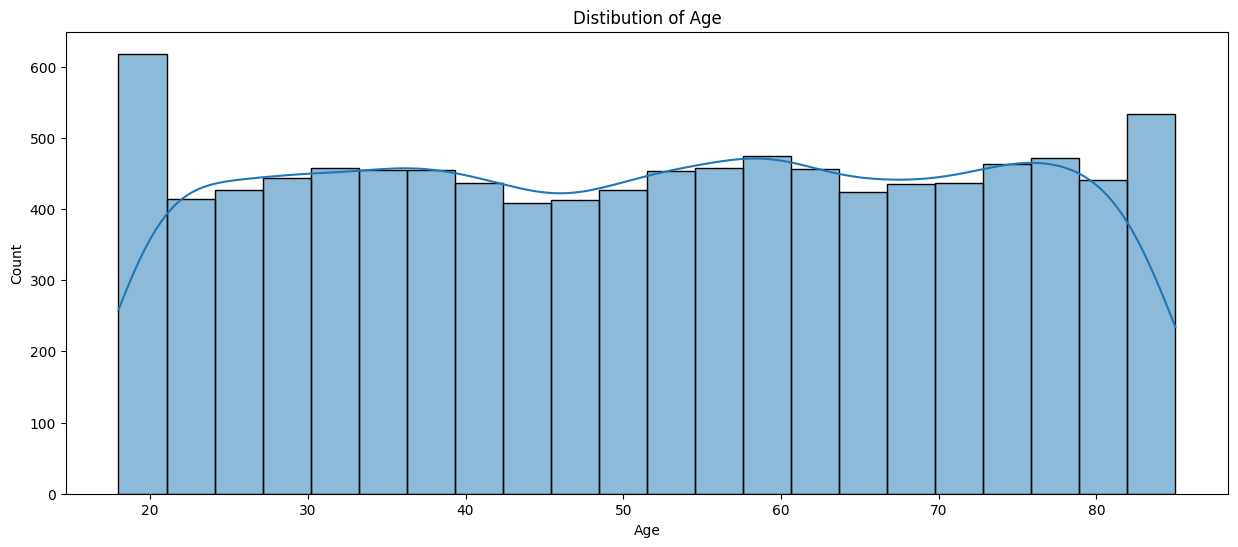

In [ ]:
# Distribution of Age
plt.figure(figsize=(15,6))
sns.histplot(x=health_data['Age'],kde=True)
plt.title('Distibution of Age')
plt.show()

* Most of the age is distributed around 20 and also at 80
* This shows younger age people's are more aware and concern with health-care rather then people's who's age lies in range of 21 - 65

## Distribution of Billing Amount

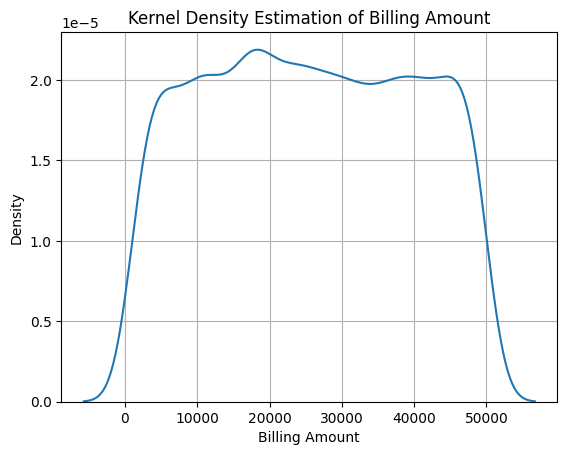

In [ ]:
# Distribution of Billing Amount
sns.kdeplot(health_data['Billing Amount'])
plt.title('Kernel Density Estimation of Billing Amount')
plt.grid()
plt.show()

## Distribution of Room Number

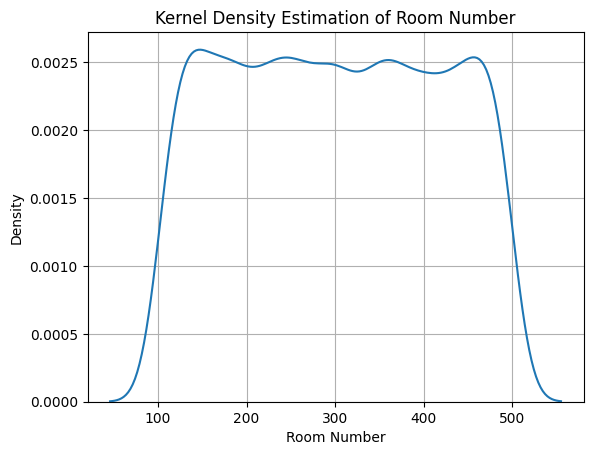

In [ ]:
# Distribution of Room Number
sns.kdeplot(health_data['Room Number'])
plt.title('Kernel Density Estimation of Room Number')
plt.grid()
plt.show()

## Distribution of Doctors

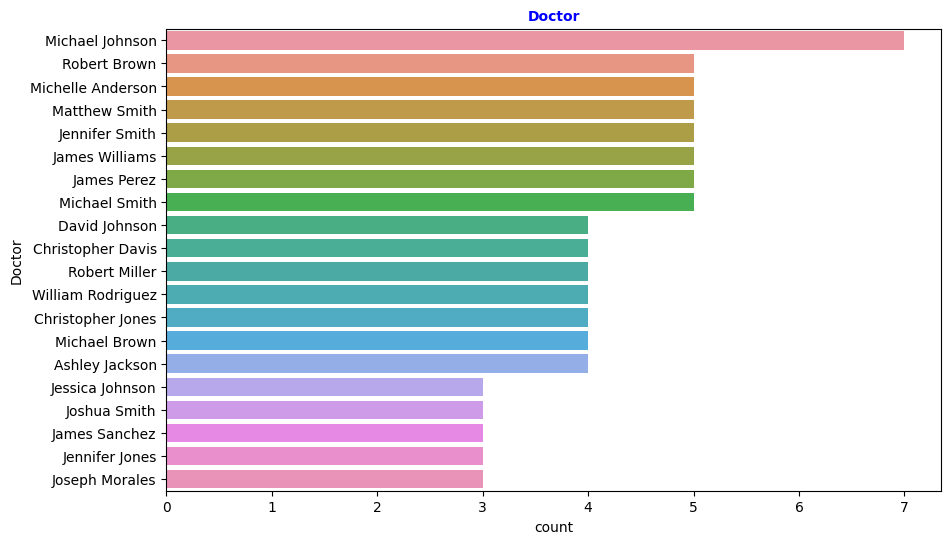

In [ ]:
# Doctors
# Selecting the top 20 doctors based on their occurrences
top_doctors = health_data['Doctor'].value_counts().iloc[:20].index

# Creating the count plot
plt.figure(figsize=(10, 6))
sns.countplot(data=health_data, y='Doctor', order=top_doctors)
plt.title("Doctor", fontsize=10, fontweight="bold", color="blue")
plt.show()

* The most visited doctor is Michael Johnson

## Distribution of Hospitals

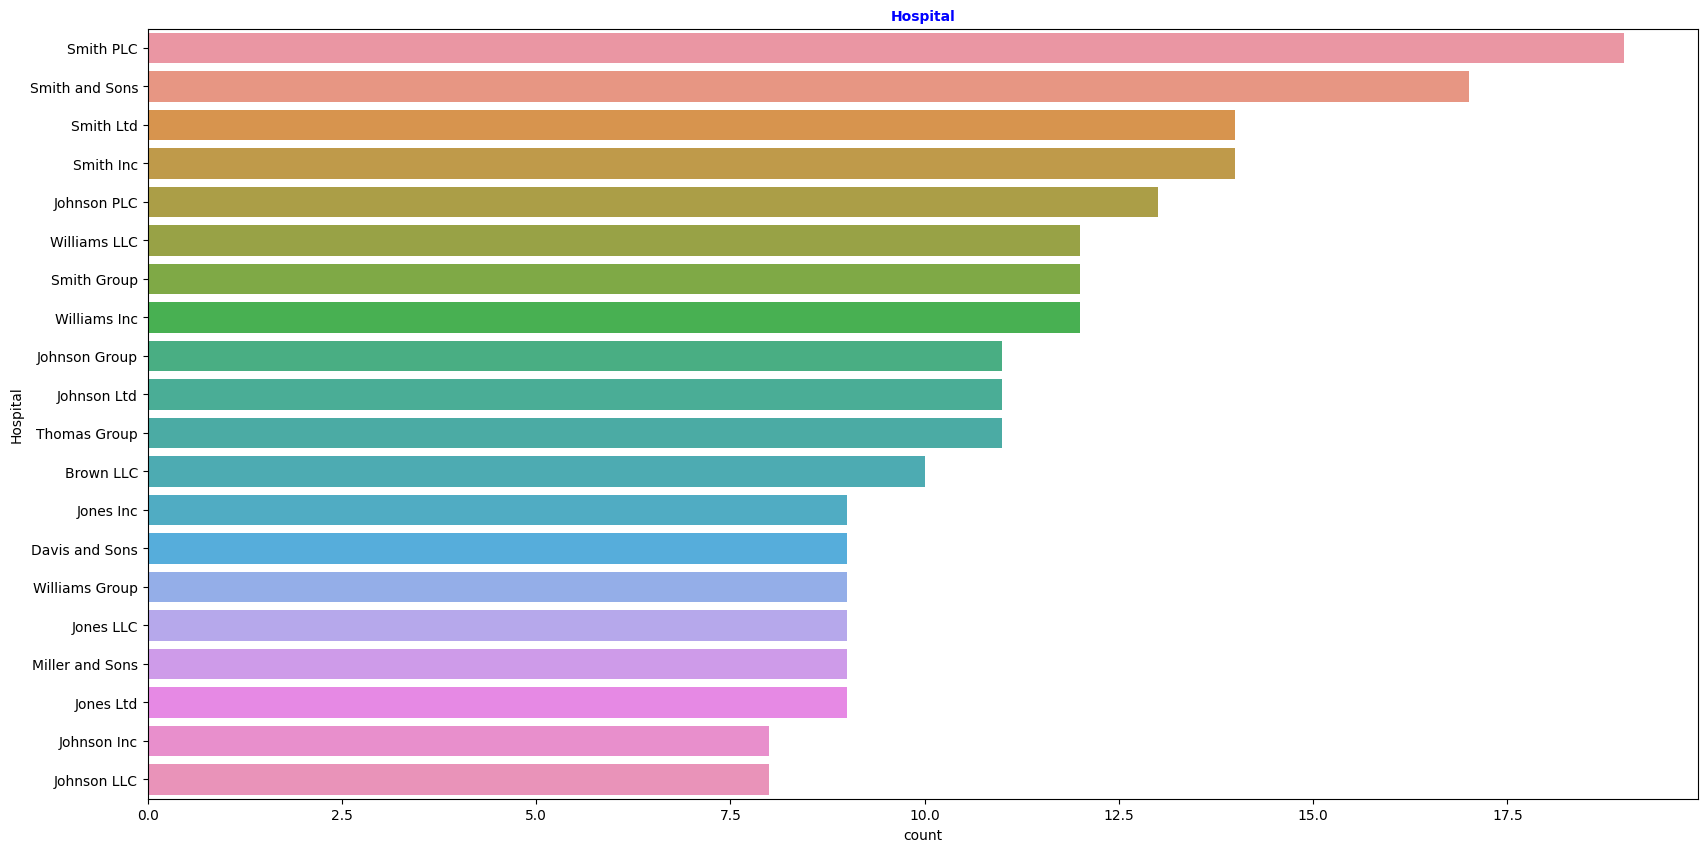

In [ ]:
# Hospital
# Selecting the top 20 hospitals based on their occurrences
top_hospitals = health_data['Hospital'].value_counts().iloc[:20].index

# Creating the count plot
plt.figure(figsize=(20, 10))
sns.countplot(data=health_data, y='Hospital', order=top_hospitals)
plt.title("Hospital", fontsize=10, fontweight="bold", color="blue")
plt.show()

* Most frequent hospital in this dataset is SMITH PLC, and follow up by SMITH AND SONS, SMITH LTD, SMITH INC

## Distribution of patients by gender

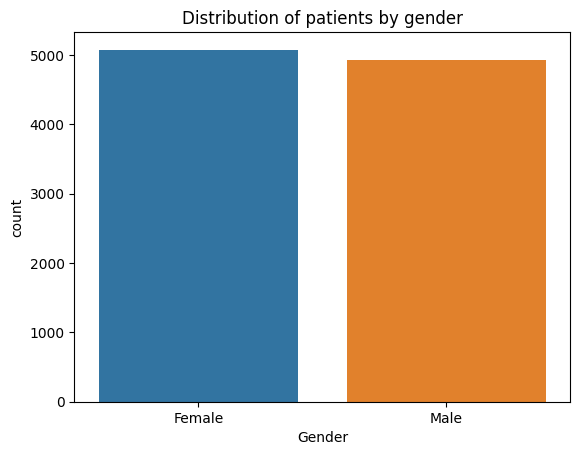

In [ ]:
# Distribution of patients by gender
sns.countplot(x=health_data['Gender'])
plt.title('Distribution of patients by gender')
plt.show()

* This graphs shows there are more females involved in health care, that's why women's live longer than men's.

## Distribution of patients by Blood Type

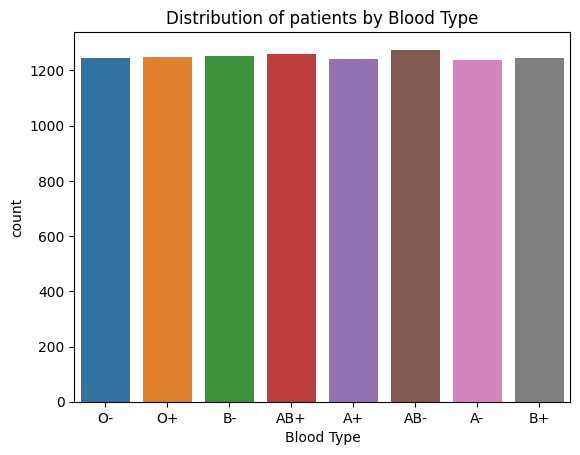

In [ ]:
# Distribution of patients by Blood Type
sns.countplot(x=health_data['Blood Type'])
plt.title('Distribution of patients by Blood Type')
plt.show()

* AB is most counted blood group in the dataset followed up with AB+, B-, O+
* Type AB-negative blood is considered a universal plasma donor, meaning anyone can receive type AB-negative plasma

## Distribution of patients by Medical Condition

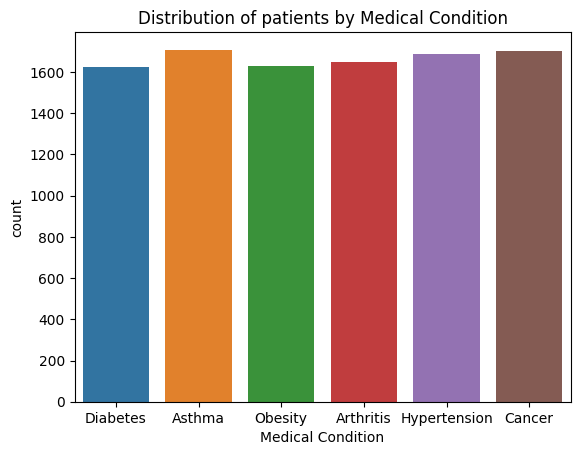

In [ ]:
# Distribution of patients by Medical Condition
sns.countplot(x=health_data['Medical Condition'])
plt.title('Distribution of patients by Medical Condition')
plt.show()

* Most medical-condition is ASTHMA, CANCER, HYPERTENSION.
* This shows most of the test are taken from most stressful people segment and we can also sale them health benefits and sale health-insurance.

## Distribution of patients by Insurance Provider

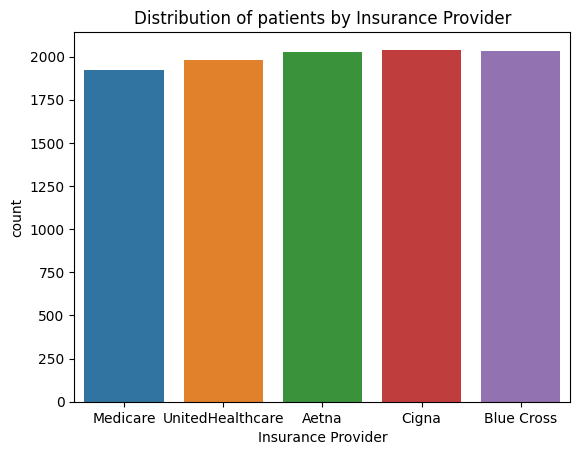

In [ ]:
# Distribution of patients by Insurance Provider
sns.countplot(x=health_data['Insurance Provider'])
plt.title('Distribution of patients by Insurance Provider')
plt.show()

* Who have buyed cigna healthcare are getting ill most.

## Distribution of patients by Admission Type

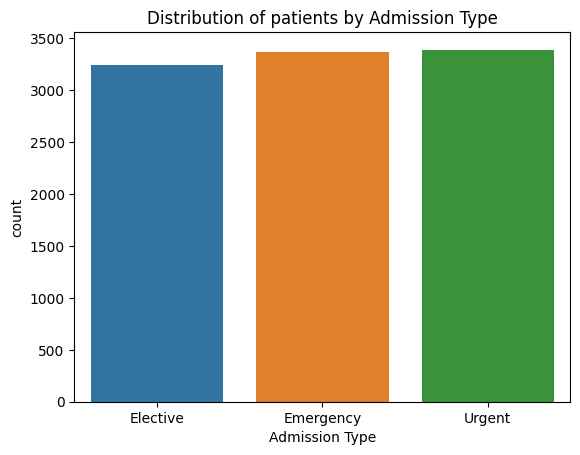

In [ ]:
# Distribution of patients by Admission Type
sns.countplot(x=health_data['Admission Type'])
plt.title('Distribution of patients by Admission Type')
plt.show()

* Most cases are marked as urgent.

## Distribution of patients by Medication

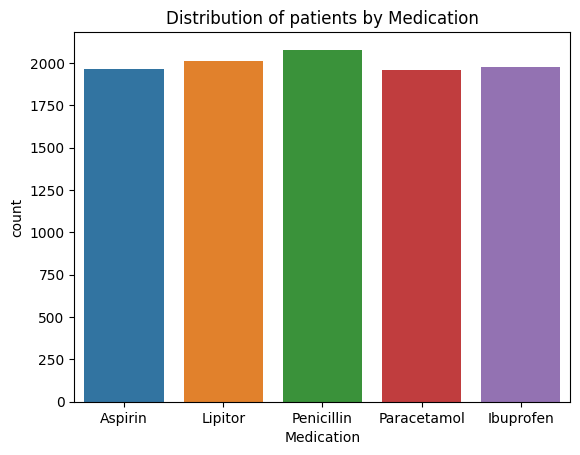

In [ ]:
# Distribution of patients by Medication
sns.countplot(x=health_data['Medication'])
plt.title('Distribution of patients by Medication')
plt.show()

* Penicillin is the medication used to manage and treat a wide range of infections and treating infection.

## Distribution of patients by Test Results

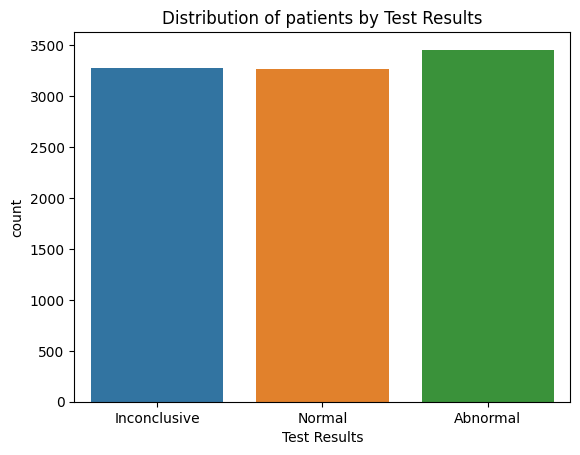

In [ ]:
# Distribution of patients by Test Results
sns.countplot(x=health_data['Test Results'])
plt.title('Distribution of patients by Test Results')
plt.show()

## Billing Amount according to Medical Condition and Test Results

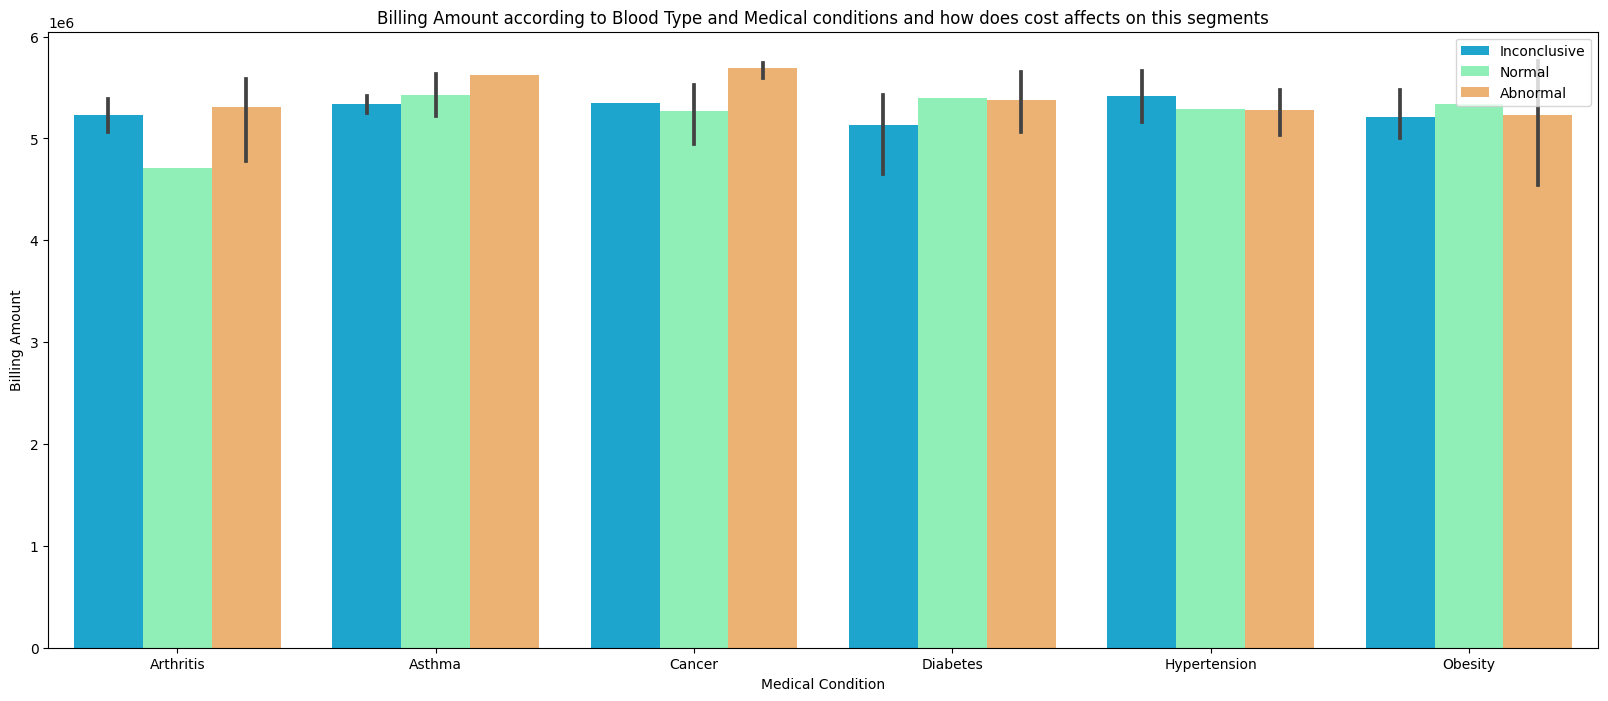

In [ ]:
# Billing Amount according to Medical Condition and Test Results
df1 = health_data.groupby(['Blood Type', 'Medical Condition'])[['Billing Amount']].sum().reset_index()
plt.figure(figsize=(20,8))
sns.barplot(x=df1['Medical Condition'], y=df1['Billing Amount'], hue=health_data['Test Results'], palette="rainbow")
plt.title("Billing Amount according to Blood Type and Medical conditions and how does cost affects on this segments")
plt.legend(loc='upper right') # position of the legend
plt.ylabel("Billing Amount")
plt.show()

## Blood Type - Medical Conditions

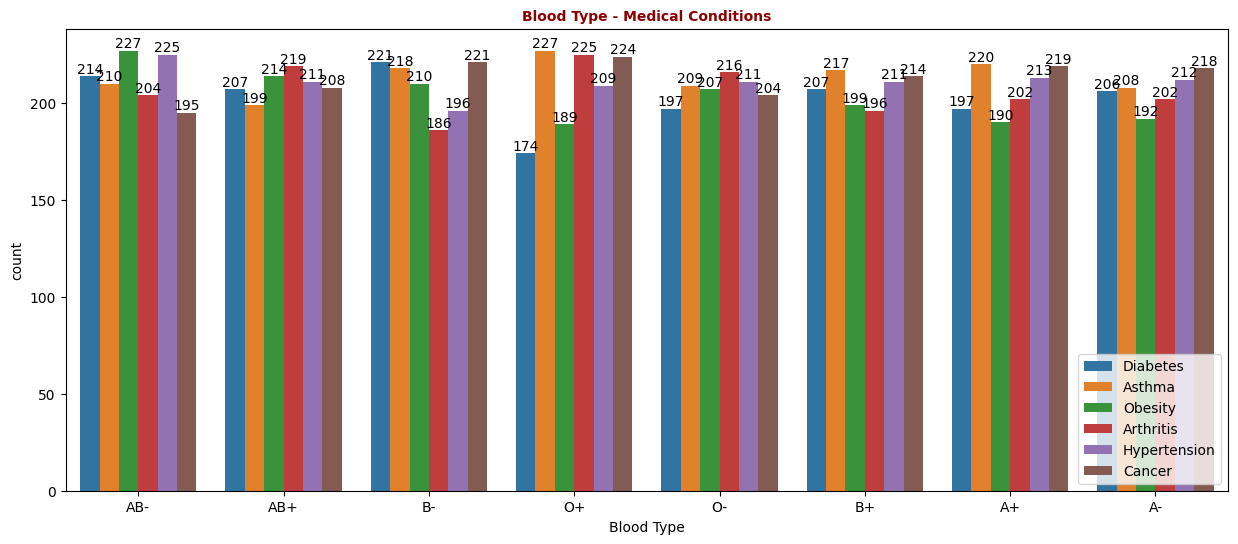

In [ ]:
# Create the count plot
plt.figure(figsize=(15, 6))
ax = sns.countplot(data=health_data, x="Blood Type", hue='Medical Condition', order=health_data['Blood Type'].value_counts().index)
plt.legend(loc='lower right')  # Adding legend for 'Medical Condition'

# Annotate each bar with its count
for rect in ax.patches:
    plt.text(rect.get_x() + rect.get_width() / 2, rect.get_height(), int(rect.get_height()),
             ha='center', va='bottom', color='black')

plt.title("Blood Type - Medical Conditions", fontsize=10, fontweight="bold", color="darkred")
plt.show()

* AB- : most of patient are in Hypertention or obesity because both are connected if you are in obesity then most probably you can be in hypertention
* AB+ : most patient are target of Arthritis and Obesity
* B- : most of patient are target of Cancer & Diabetes
* O+ : most of patient are target of Asthma

## Blood Type - Gender

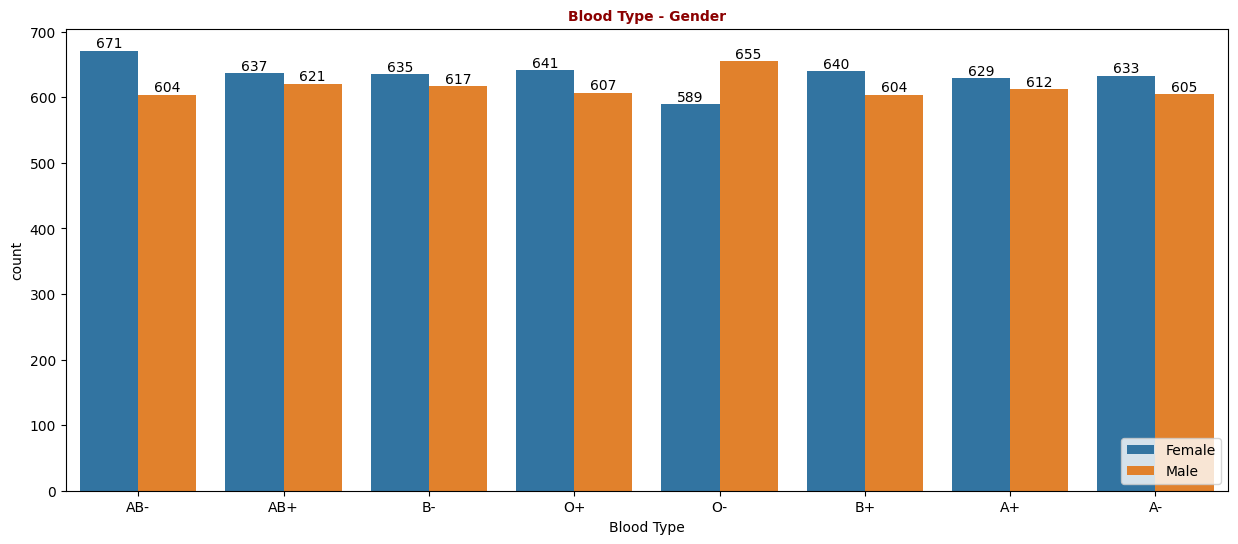

In [ ]:
# Create the count plot
plt.figure(figsize=(15, 6))
ax = sns.countplot(data=health_data, x="Blood Type", hue='Gender', order=health_data['Blood Type'].value_counts().index)
plt.legend(loc='lower right')  # Adding legend for 'Gender'

# Annotate each bar with its count
for rect in ax.patches:
    plt.text(rect.get_x() + rect.get_width() / 2, rect.get_height(), int(rect.get_height()),
             ha='center', va='bottom', color='black')

plt.title("Blood Type - Gender", fontsize=10, fontweight="bold", color="darkred")
plt.show()

## Blood Type - Medication

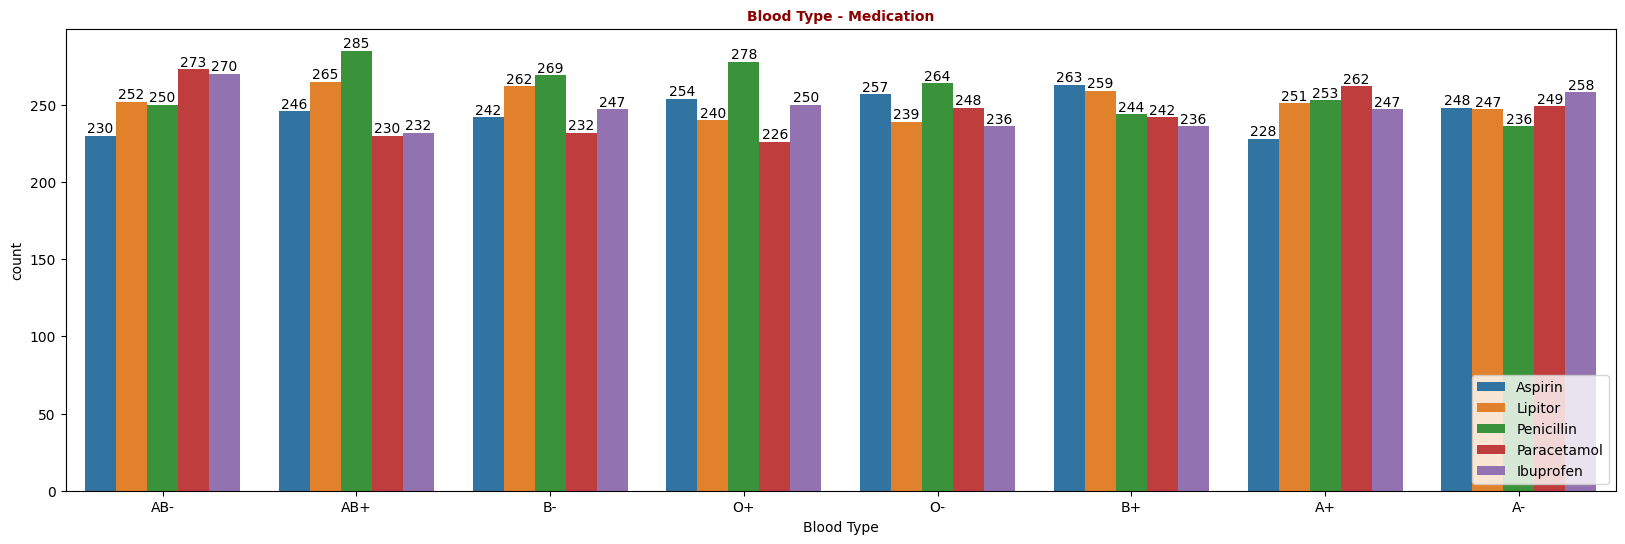

In [ ]:
# Create the count plot
plt.figure(figsize=(20, 6))
ax = sns.countplot(data=health_data, x="Blood Type", hue='Medication', order=health_data['Blood Type'].value_counts().index)
plt.legend(loc='lower right')  # Adding legend for 'Medication'

# Annotate each bar with its count
for rect in ax.patches:
    plt.text(rect.get_x() + rect.get_width() / 2, rect.get_height(), int(rect.get_height()),
             ha='center', va='bottom', color='black')

plt.title("Blood Type - Medication", fontsize=10, fontweight="bold", color="darkred")
plt.show()

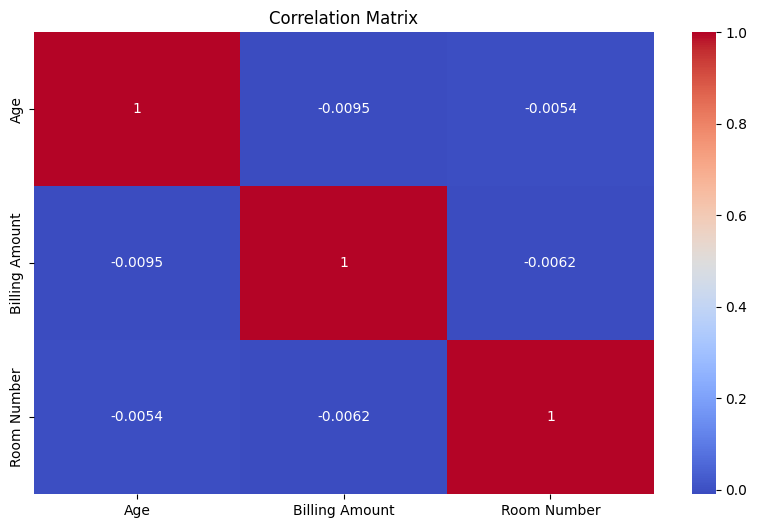

In [ ]:
# Calculate the correlation matrix
numerical_columns = health_data.select_dtypes(include=['int64','float64']).corr()

# Visualize the correlation matrix using a heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(numerical_columns, annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()

* valeurs proches de 0 -> une faible corrélation ou l'absence de relation linéaire entre les variables.
* valeurs proches de 1 ou -1 -> une forte corrélation entre les variables.

# **Checking the dataset for outliers (valeurs aberrantes)**
---




In [ ]:
# Label Encoding for Ordinal Variables:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
for col in health_data.columns:
    if health_data[col].dtype == 'object':  # Select columns with non-numeric data
        health_data[col + '_encoded'] = label_encoder.fit_transform(health_data[col])

In [ ]:
# Encoding for Nominal Variables:
health_data_encoded = pd.get_dummies(health_data, columns=health_data.select_dtypes(include=['object']).columns)

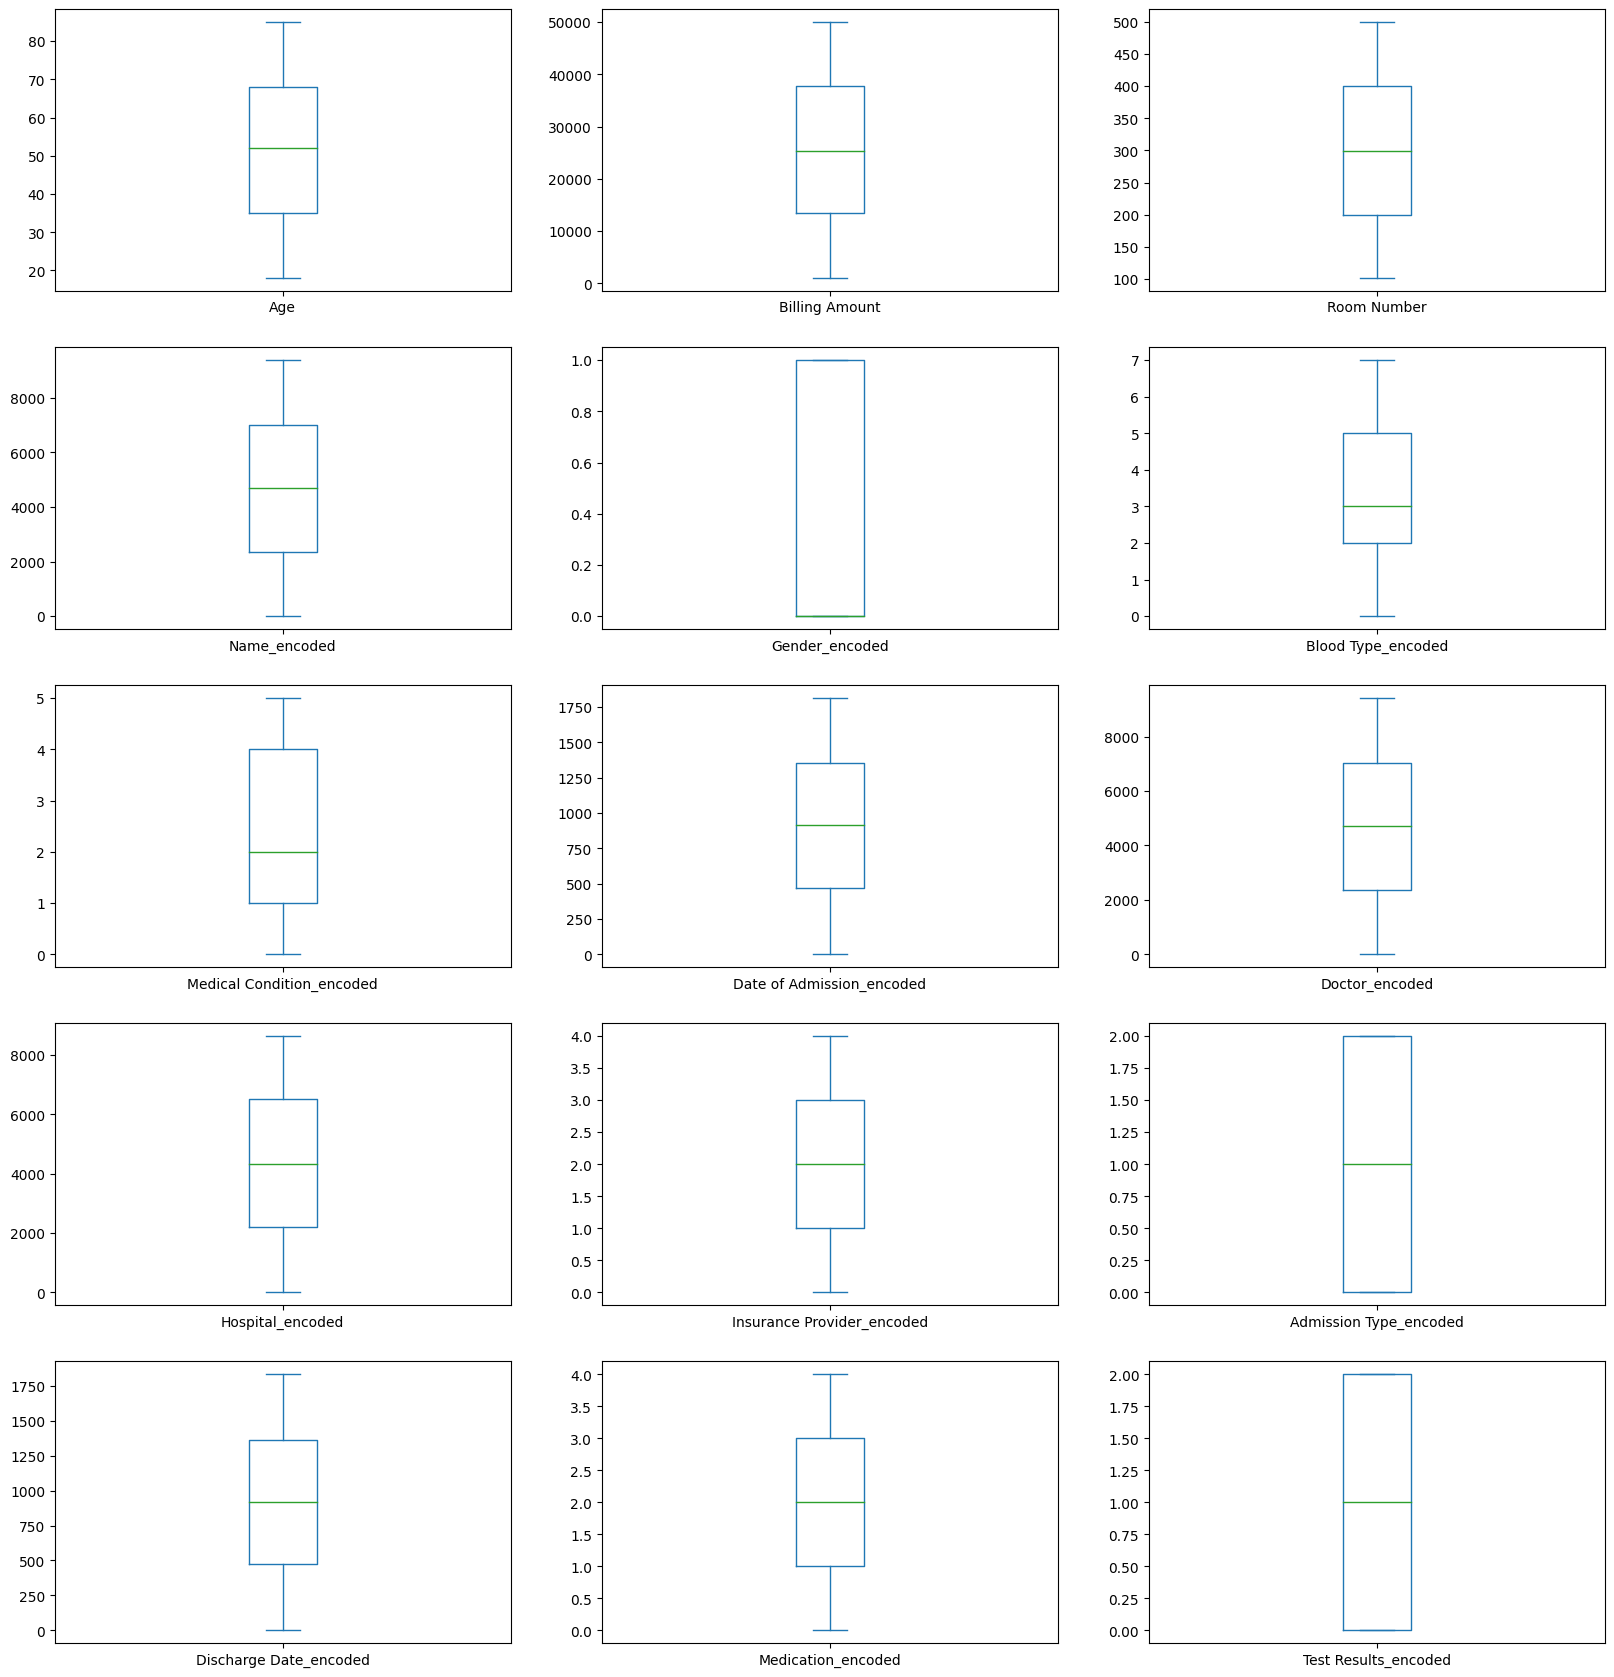

In [ ]:
# Boxplot Visualization:
health_data.plot(kind="box",subplots=True,layout=(7,3),figsize=(20,30));

* After analyzing the data for outliers, we noticed that there are no extreme or unusual values in the dataset.

# Re-checking for duplicate lines, missing values or null values

---



In [ ]:
health_data_encoded.duplicated().sum()
# health_data.duplicated().sum()

0

In [ ]:
health_data_encoded.isna().sum()

Age                          0
Billing Amount               0
Room Number                  0
Name_encoded                 0
Gender_encoded               0
                            ..
Medication_Paracetamol       0
Medication_Penicillin        0
Test Results_Abnormal        0
Test Results_Inconclusive    0
Test Results_Normal          0
Length: 31129, dtype: int64

* There are no missing or duplicated values

# **Supervised Learning**

---



In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.neural_network import MLPRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# **Data Encode**

In [ ]:
from sklearn.preprocessing import LabelEncoder
lc = LabelEncoder()
for col in health_data.columns:
    if col!='Age':
        health_data[col]=lc.fit_transform(health_data[col])
health_data.head()

,Name,Age,Gender,Blood Type,Medical Condition,Date of Admission,Doctor,Hospital,Insurance Provider,Billing Amount,...,Blood Type_encoded,Medical Condition_encoded,Date of Admission_encoded,Doctor_encoded,Hospital_encoded,Insurance Provider_encoded,Admission Type_encoded,Discharge Date_encoded,Medication_encoded,Test Results_encoded
0,8837,81,0,7,3,1468,7167,7960,3,7439,...,7,3,1468,7167,7960,3,0,1476,0,1
1,7736,35,1,6,1,1664,2597,978,4,9444,...,6,1,1664,2597,978,4,1,1672,2,2
2,1508,61,1,5,5,71,7180,7996,3,7329,...,5,5,71,7180,7996,3,1,96,2,2
3,721,49,1,5,1,548,1169,2482,3,4589,...,5,1,548,1169,2482,3,2,544,4,0
4,6782,51,1,7,0,980,2775,3908,4,3469,...,7,0,980,2775,3908,4,2,996,3,2


In [ ]:
health_data.corr()['Test Results']

Name                          0.014524
Age                           0.008747
Gender                       -0.010472
Blood Type                   -0.003698
Medical Condition             0.001659
Date of Admission            -0.002945
Doctor                        0.003527
Hospital                     -0.000391
Insurance Provider           -0.010429
Billing Amount               -0.005883
Room Number                   0.007004
Admission Type               -0.010964
Discharge Date               -0.003077
Medication                   -0.013938
Test Results                  1.000000
Name_encoded                  0.014524
Gender_encoded               -0.010472
Blood Type_encoded           -0.003698
Medical Condition_encoded     0.001659
Date of Admission_encoded    -0.002945
Doctor_encoded                0.003527
Hospital_encoded             -0.000391
Insurance Provider_encoded   -0.010429
Admission Type_encoded       -0.010964
Discharge Date_encoded       -0.003077
Medication_encoded       

## Split the Data for Training and Test

In [ ]:
X=health_data.drop(['Test Results'],axis=1) # Caractéristiques
y = health_data['Test Results']  # Étiquettes
# 2. Divisez le jeu de données en ensembles d'apprentissage et de test
from sklearn.model_selection import train_test_split
# Divisez les données avec 75% pour l'apprentissage et 25% pour le test
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.25, random_state=42)

In [ ]:
X.shape, X_train.shape, y_test.shape

((10000, 26), (7500, 26), (2500,))

# **KNN**

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn_model = KNeighborsClassifier(n_neighbors=3, metric='euclidean')
knn_model.fit(X_train, y_train)

KNeighborsClassifier(metric='euclidean', n_neighbors=3)

In [ ]:
from sklearn.metrics import confusion_matrix, precision_score, recall_score
y_pred = knn_model.predict(X_test)
# Calculez la matrice de confusion
conf_matrix = confusion_matrix(y_test, y_pred)
# Calculez la précision et le rappel
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
# Affichez les résultats
print("Matrice de Confusion:\n", conf_matrix)
print("Précision: {:.2f}".format(precision))
print("Rappel: {:.2f}".format(recall))

Matrice de Confusion:
 [[460 228 195]
 [378 220 188]
 [393 220 218]]
Précision: 0.36
Rappel: 0.36


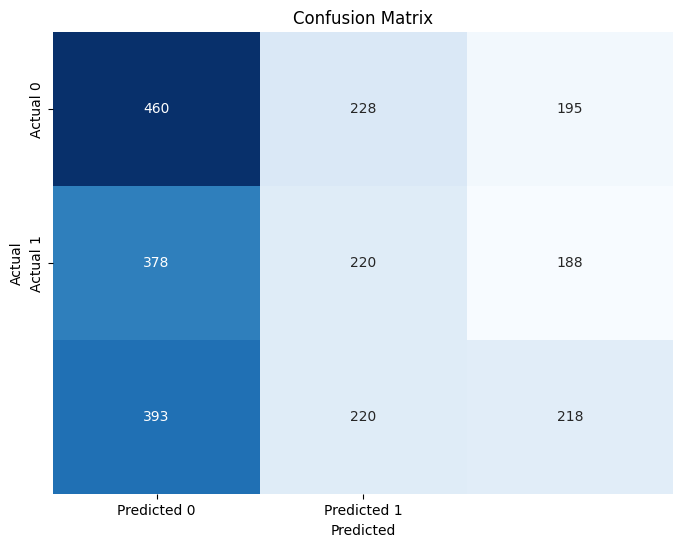

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Create a confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Create a heatmap for the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap='Blues', cbar=False, xticklabels=['Predicted 0', 'Predicted 1'], yticklabels=['Actual 0', 'Actual 1'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

## Optimal scores & parameters for KNN

---



In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

# Création du modèle
knn = KNeighborsClassifier()

# Définition de la grille des hyperparamètres à rechercher
param_grid_knn = {
    'n_neighbors': [3, 5, 7],  # Exemple de paramètres à optimiser
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan']
}

# Recherche des meilleurs paramètres avec GridSearchCV et CV=4
grid_search_knn = GridSearchCV(knn, param_grid_knn, cv=4)
grid_search_knn.fit(X_train, y_train)

# Meilleurs paramètres et meilleur score
best_params_knn = grid_search_knn.best_params_
best_score_knn = grid_search_knn.best_score_

print("Best param of KNN : ", best_params_knn)
print("Best score for KNN : ", best_score_knn)


Best param of KNN :  {'metric': 'manhattan', 'n_neighbors': 3, 'weights': 'uniform'}
Best score for KNN :  0.3350666666666666


# **Tree Decision**

In [ ]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()
model.fit(X_train,y_train)

DecisionTreeClassifier()

In [ ]:
from sklearn.metrics import classification_report

y_pred = model.predict(X_test)
print(f"The accuraccy score is: --->>  {accuracy_score(y_test,y_pred)}")
print(f"The Confusion Matrix is: --->> \n{confusion_matrix(y_test,y_pred)}")
print(f"The Classification Report is: --->>\n {classification_report(y_test,y_pred)}")

The accuraccy score is: --->>  1.0
The Confusion Matrix is: --->> 
[[883   0   0]
 [  0 786   0]
 [  0   0 831]]
The Classification Report is: --->>
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       883
           1       1.00      1.00      1.00       786
           2       1.00      1.00      1.00       831

    accuracy                           1.00      2500
   macro avg       1.00      1.00      1.00      2500
weighted avg       1.00      1.00      1.00      2500



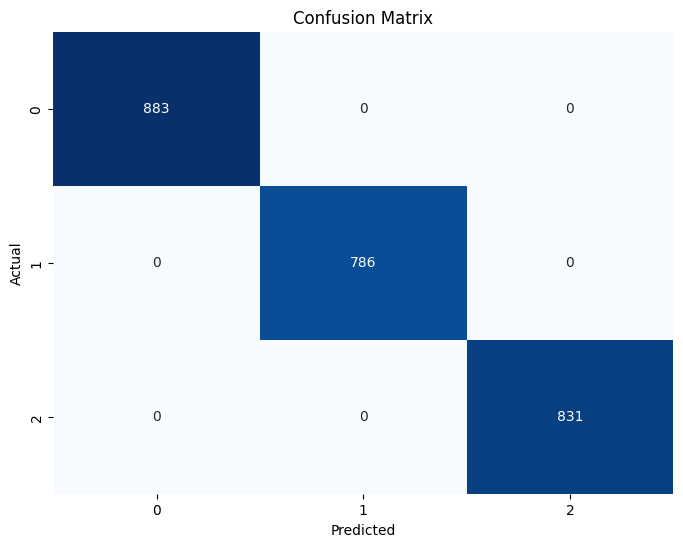

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate of the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Displaying matrice with heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='d', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


## Optimal scores & parameters for tree decision

---



In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

# Création du modèle
decision_tree = DecisionTreeClassifier()

# Définition de la grille des hyperparamètres à rechercher
param_grid_decision_tree = {
    'max_depth': [3, 5, 7],  # Exemple de paramètres à optimiser
    'min_samples_split': [2, 5, 10]
}

# Recherche des meilleurs paramètres avec GridSearchCV et CV=4
grid_search_decision_tree = GridSearchCV(decision_tree, param_grid_decision_tree, cv=4)
grid_search_decision_tree.fit(X_train, y_train)

# Meilleurs paramètres et meilleur score
best_params_decision_tree = grid_search_decision_tree.best_params_
best_score_decision_tree = grid_search_decision_tree.best_score_

print("Best param of tree decision : ", best_params_decision_tree)
print("Best score for tree decision : ", best_score_decision_tree)

Best param of tree decision :  {'max_depth': 3, 'min_samples_split': 2}
Best score for tree decision :  1.0


# **Accuracy of The Two Models**

---

Accuracy for Decision Tree: 1.00
Accuracy for KNN: 0.35


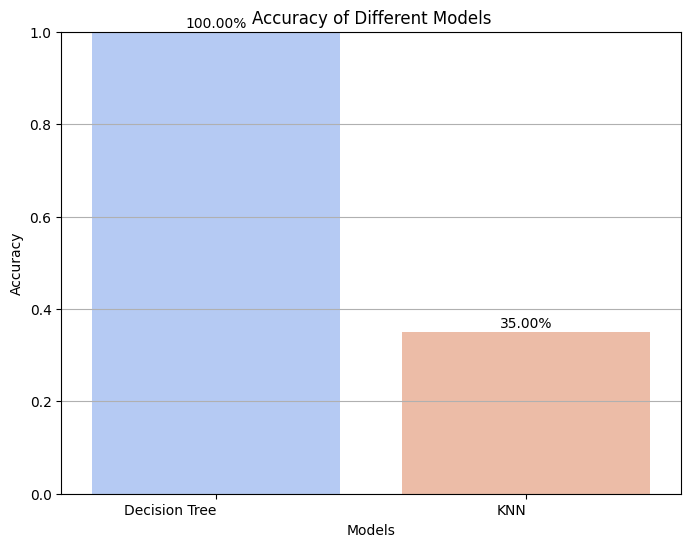

In [ ]:
# Models used
models = {
    'Decision Tree': DecisionTreeClassifier(),
    'KNN': KNeighborsClassifier()
}

# List to save accurracies
accuracies = []

# learning and evaluating models
for model_name, model in models.items():
    model.fit(X_train, y_train)
    accuracy = accuracy_score(y_test, model.predict(X_test))
    accuracies.append(accuracy)
    print(f'Accuracy for {model_name}: {accuracy:.2f}')

# displaying accuracy
plt.figure(figsize=(8, 6))
sns.barplot(x=list(models.keys()), y=accuracies, palette="coolwarm")
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.title('Accuracy of Different Models')

# figure legend
for i, acc in enumerate(accuracies):
    plt.text(i, acc + 0.01, f'{acc:.2%}', ha='center', fontsize=10, color='black')

plt.ylim([0, 1])
plt.xticks(ha='right')
plt.grid(axis='y')

plt.show()

* The Decision Tree model achieved a perfect accuracy of 1.00 on the test set ==> it predicted all observations correctly.
* The KNN model has a lower accuracy of 0.3, it predicted only 30% of the test set